## Deskripsi proyek

Proyek ini mengulas dan mengidentifikasi data dari situs Y.Afisha, Mengidentifikasi pola-pola yang dapat mengoptimalkan anggaran biaya pemasaran sehingga berpotensial menaikan penjualan untuk dapat merencanakan kampanye iklan berikutnya.
langkah-langkah yang dilakukan yaitu:
1. Memuat library yang dibutuhkan
2. Memuat datanya
3. Melakukan Pra-pemrosesan
4. Analisis data
5. Menyusun laporan dan menghitung metrik
7. Kesimpulan

## Memuat library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats as st
import seaborn as sns

## Memuat data

### Visits

In [3]:
visits = pd.read_csv('/datasets/visits_log_us.csv', dtype={'Device' : 'category', 'Uid' : 'string', 'Source Id' : 'string'},
                    parse_dates=['End Ts', 'Start Ts'])
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


**huruf depan pada nama semua kolom menggunakan huruf kapital, untuk mempermudah proses pengerjaan kedepannya maka diubah menjadi huruf kecil**

In [4]:
visits = visits.rename(columns=lambda x: x.lower())

In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end ts     359400 non-null  datetime64[ns]
 2   source id  359400 non-null  string        
 3   start ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  string        
dtypes: category(1), datetime64[ns](2), string(2)
memory usage: 11.3 MB


In [6]:
visits.shape

(359400, 5)

**dari data diatas dapat kita lihat bahwa tidak ada nilai yag hilang pada semua kolom maka tidak perlu menggunakan isna() untuk mencari nilai yang hilang. dan terdapat 359400 baris pada data visits**

In [7]:
visits.memory_usage('deep')

Index            128
device        359524
end ts       2875200
source id    2875200
start ts     2875200
uid          2875200
dtype: int64

In [8]:
visits.duplicated().sum()

0

**Tidak terdapat data duplikat, maka data sudah dapat dianalisis**

### Orders

In [9]:
orders = pd.read_csv('/datasets/orders_log_us.csv', parse_dates=['Buy Ts'], dtype={'Uid' : 'string'})
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


**huruf depan pada nama semua kolom menggunakan huruf kapital, untuk mempermudah proses pengerjaan kedepannya maka diubah menjadi huruf kecil**

In [10]:
orders = orders.rename(columns=lambda x: x.lower())

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  string        
dtypes: datetime64[ns](1), float64(1), string(1)
memory usage: 1.2 MB


In [12]:
orders.shape

(50415, 3)

**informasi dari data orders diatas dapat kita lihat bahwa tidak ada nilai yag hilang pada semua kolom maka tidak perlu menggunakan isna() untuk mencari nilai yang hilang. dan terdapat 50415 baris pada data orders**

In [13]:
orders.memory_usage()

Index         128
buy ts     403320
revenue    403320
uid        403320
dtype: int64

In [14]:
orders.duplicated().sum()

0

**Tidak terdapat data duplikat, maka data sudah dapat dianalisis**

### Costs

In [15]:
costs = pd.read_csv('/datasets/costs_us.csv', parse_dates=['dt'])
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [16]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [17]:
costs.shape

(2542, 3)

**informasi dari data costs diatas dapat kita lihat bahwa tidak ada nilai yag hilang pada semua kolom maka tidak perlu menggunakan isna() untuk mencari nilai yang hilang. dan terdapat 2542 baris pada data costs**

In [18]:
costs.memory_usage()

Index          128
source_id    20336
dt           20336
costs        20336
dtype: int64

In [19]:
costs.duplicated().sum()

0

**Tidak terdapat data duplikat, maka data sudah dapat dianalisis**

## Menyusun laporan dan menghitung metrik

### Produk

In [20]:
# jumlah orang yang menggunakan produk setiap bulan
visits['session_year'] = visits['start ts'].astype('datetime64[Y]')
visits['session_month'] = visits['start ts'].astype('datetime64[M]')
visits['session_week'] = visits['start ts'].astype('datetime64[W]')
visits['session_date'] = visits['start ts'].dt.date
visits.head()

,device,end ts,source id,start ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27


In [21]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   device         359400 non-null  category      
 1   end ts         359400 non-null  datetime64[ns]
 2   source id      359400 non-null  string        
 3   start ts       359400 non-null  datetime64[ns]
 4   uid            359400 non-null  string        
 5   session_year   359400 non-null  datetime64[ns]
 6   session_month  359400 non-null  datetime64[ns]
 7   session_week   359400 non-null  datetime64[ns]
 8   session_date   359400 non-null  object        
dtypes: category(1), datetime64[ns](5), object(1), string(2)
memory usage: 22.3+ MB


In [22]:
mau_total = visits.groupby('session_month').agg({'uid':'nunique'}).mean()
mau_total.round().astype('int')

uid    23228
dtype: int64

**banyaknya orang yang menggunakan produk setiap bulan yaitu sebanyak 23228 orang**

In [23]:
# jumlah orang yang menggunakan produk setiap minggu
visits['session_week'] = visits['start ts'].astype('datetime64[W]')
visits.head()

,device,end ts,source id,start ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27


In [24]:
wau_total = visits.groupby('session_week').agg({'uid':'nunique'}).mean()
wau_total.round().astype('int')

uid    5724
dtype: int64

**jumlah orang yang menggunakan produk setiap minggu yaitu 5724 orang**

In [25]:
# jumlah orang yang menggunakan produk setiap hari
visits['session_date'] = visits['start ts'].astype('datetime64[D]')
visits.head()

,device,end ts,source id,start ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27


In [26]:
dau_total = visits.groupby('session_date').agg({'uid':'nunique'}).mean()
dau_total.round().astype('int')

uid    908
dtype: int64

**jumlah orang yang menggunakan produk setiap harinya yaitu 908 orang**

In [27]:
visits['session_year'] = visits['start ts'].dt.year
visits

,device,end ts,source id,start ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,2017-12-21,2017-12-27
...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,2017-07-01,2017-07-27,2017-07-29
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,2018-01-01,2018-01-25,2018-01-25
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018,2018-03-01,2018-03-01,2018-03-03
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,2017-11-01,2017-11-02,2017-11-02


In [28]:
sessions_per_user = visits.groupby(['session_year', 'session_month']).agg(
    {'uid': ['count', 'nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = (
    sessions_per_user['n_sessions'] / sessions_per_user['n_users']
)
sessions_per_user

n_sessions  n_users  sessions_per_user
session_year session_month                                        
2017         2017-06-01          16505    13259           1.244815
             2017-07-01          17828    14183           1.256998
             2017-08-01          14355    11631           1.234202
             2017-09-01          23907    18975           1.259921
             2017-10-01          37903    29692           1.276539
             2017-11-01          43969    32797           1.340641
             2017-12-01          41983    31557           1.330386
2018         2018-01-01          36939    28716           1.286356
             2018-02-01          37182    28749           1.293332
             2018-03-01          35679    27473           1.298693
             2018-04-01          26515    21008           1.262138
             2018-05-01          26635    20701           1.286653

<AxesSubplot:xlabel='session_year,session_month'>

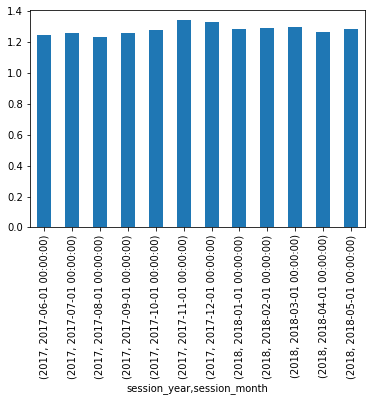

In [29]:
sessions_per_user['sessions_per_user'].plot(kind='bar')

**Secara rata-rata, ternyata setiap pengguna menghabiskan paling banyak 1 sesi per bulan untuk menggunakan situs Y.Afisha, yang artinya, bisa disebut bahwa situs ini tidak digunakan secara rutin.**

In [30]:
#lama durasi untuk setiap sesi
visits['duration_per_session'] = (visits['end ts']-visits['start ts']).dt.seconds
visits

,device,end ts,source id,start ts,uid,session_year,session_month,session_week,session_date,duration_per_session
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,2017-12-21,2017-12-27,0
...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,2017-07-01,2017-07-27,2017-07-29,19
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,2018-01-01,2018-01-25,2018-01-25,19
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018,2018-03-01,2018-03-01,2018-03-03,19
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,2017-11-01,2017-11-02,2017-11-02,19


In [31]:
visits['duration_per_session'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: duration_per_session, dtype: float64

<AxesSubplot:>

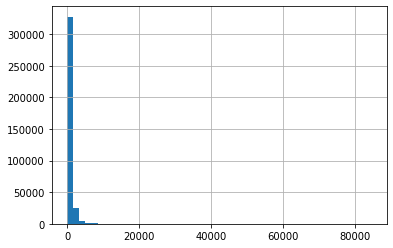

In [32]:

visits['duration_per_session'].hist(bins = 50)

**karena distribusi dari durasi tiap pelanggan berbeda atau distribusinya tidak normal, maka untuk melihat distribusi durasi dari tiap pelanggan kita menggunakan modus atau nilai yang sering muncul pada kolom durasi.**

In [33]:
visits['duration_per_session'].mode()

0    60
dtype: int64

**Durasi dari tiap pengguna untuk melakukan pembelian rata-rata yaitu sekitar 60 detik. Saya rasa durasi ini tidak begitu cepat dan tidak terlalu lama pula untuk melakukan suatu pemesanan. maka hal ini bisa dibilang wajar dan mungkin tidak perlu dipermasalahkan**

In [34]:
# persentase pengguna kembali menggunakan produk per minggu
sticky_wau = dau_total / wau_total * 100
sticky_wau

uid    15.861739
dtype: float64

**persentase pengguna kembali menggunakan situs Y.Afisha per minggu yaitu sebesar 15.8% yang artinya kecil kemungkinan semua pengunjung kembali mengunjungi situs Y.Afisha**

In [35]:
# persentase pengguna kembali menggunakan produk per bulan
sticky_mau = dau_total / mau_total * 100
sticky_mau

uid    3.90897
dtype: float64

**persentase pengguna kembali menggunakan situs Y.Afisha dilihat dari per bulannya yaitu sebesar 3.9% hal ini sama seperti persentase di sticky_wau. Hal ini perlu di analisis lebih lanjut apa yang mengakibatkan situs Y.Afisha tidak sering dingkunjungi**

### Penjualan

In [36]:
orders['order_month'] = orders['buy ts'].astype('datetime64[M]')
orders.head()

,buy ts,revenue,uid,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01


In [37]:
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders

,uid,first_order_month
0,10000837700716403746,2017-06-01
1,10000997030965831953,2018-01-01
2,10001199569370567060,2017-11-01
3,10002243978166172255,2017-10-01
4,10003351403065971701,2017-11-01
...,...,...
36518,999745712858219747,2017-08-01
36519,9997777271989789335,2017-11-01
36520,999906621142257600,2018-01-01
36521,9999334409150825432,2017-12-01


In [38]:
first_visit = visits.groupby('uid').agg({'session_month' : 'min'}).reset_index()
first_visit.columns = ['uid', 'first_visit_month']
first_visit.head()

,uid,first_visit_month
0,10000171586432207426,2017-12-01
1,10000344846682484395,2018-02-01
2,1000036778515242839,2017-09-01
3,10000460875579931334,2017-09-01
4,10000558740593440652,2018-01-01


In [39]:
first_order_visit = pd.merge(first_visit, first_orders, on='uid')
first_order_visit.head()

,uid,first_visit_month,first_order_month
0,10000837700716403746,2017-06-01,2017-06-01
1,10000997030965831953,2018-01-01,2018-01-01
2,10001199569370567060,2017-11-01,2017-11-01
3,10002243978166172255,2017-10-01,2017-10-01
4,10003351403065971701,2017-11-01,2017-11-01


In [40]:
first_order_visit['time_to_purchase'] = first_order_visit['first_order_month'] - first_order_visit['first_visit_month']
first_order_visit.head()

,uid,first_visit_month,first_order_month,time_to_purchase
0,10000837700716403746,2017-06-01,2017-06-01,0 days
1,10000997030965831953,2018-01-01,2018-01-01,0 days
2,10001199569370567060,2017-11-01,2017-11-01,0 days
3,10002243978166172255,2017-10-01,2017-10-01,0 days
4,10003351403065971701,2017-11-01,2017-11-01,0 days


In [41]:
first_order_visit['time_to_purchase'].describe()

count                         36523
mean     16 days 14:30:28.436875393
std      46 days 19:49:39.839421333
min                 0 days 00:00:00
25%                 0 days 00:00:00
50%                 0 days 00:00:00
75%                 0 days 00:00:00
max               334 days 00:00:00
Name: time_to_purchase, dtype: object

In [42]:
# memeriksa berapa banyak pengunjung yang melakukan pembelian di hari 0 days atau hari pertama kunjungan ke situs Y.Afisha
first_order_visit[first_order_visit['time_to_purchase'] == '0'].head()

,uid,first_visit_month,first_order_month,time_to_purchase
0,10000837700716403746,2017-06-01,2017-06-01,0 days
1,10000997030965831953,2018-01-01,2018-01-01,0 days
2,10001199569370567060,2017-11-01,2017-11-01,0 days
3,10002243978166172255,2017-10-01,2017-10-01,0 days
4,10003351403065971701,2017-11-01,2017-11-01,0 days


In [43]:
first_order_visit[first_order_visit['time_to_purchase'] == '0'].shape

(30087, 4)

**terdapat 36524 kunjungan pertama para pengunjung pada situs Y.Afisha rata-rata dan  terdapat sebanyak 30087 dari semua pengunjung melakukan pembelian pada hari pertama masuk ke situs. karena dilihat dari waktu kunjungan dan waktu pembelian selisihnya yaitu 0 days yang artinya pengnjung melakukan pembelian pada hari pertama kunjungan ke situs Y.Afisha.**

In [44]:
orders['order_date'] = orders['buy ts'].astype('datetime64[D]')
orders.head()

,buy ts,revenue,uid,order_month,order_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01


In [45]:
# jumlah pesanan yang dibuat selama periode perhari
total_order_per_day = orders.groupby('order_date')['uid'].count().reset_index()
total_order_per_day.head()

,order_date,uid
0,2017-06-01,96
1,2017-06-02,111
2,2017-06-03,67
3,2017-06-04,66
4,2017-06-05,161


In [46]:
total_order_per_day.describe()

,uid
count,364.000000
mean,138.502747
std,76.858480
min,1.000000
25%,82.750000
50%,136.000000
75%,177.000000
max,814.000000


In [47]:
total_order_per_day[total_order_per_day['uid'] == 814]

,order_date,uid
176,2017-11-24,814


**Rata-rata Jumlah pesanan yang di buat perharinya dari tanggal 2017-06-01 hingga 2018-06-01 yaitu sebanyak 138 pesanan dan pesanan maksimal perharinya ada pada tanggal 2017-11-24 sebanyak 814 pesanan**

In [48]:
# jumlah pesanan yang dibuat selama periode perbulan
total_order_per_month = orders.groupby('order_month')['uid'].count()
total_order_per_month

order_month
2017-06-01    2354
2017-07-01    2363
2017-08-01    1807
2017-09-01    3387
2017-10-01    5679
2017-11-01    5659
2017-12-01    6218
2018-01-01    4721
2018-02-01    5281
2018-03-01    5326
2018-04-01    3273
2018-05-01    4346
2018-06-01       1
Name: uid, dtype: int64

**Jumlah pesanan tertinggi ada dibulan desember tahun 2017 sebanyak 6218**

In [49]:
# besaran rata-rata pembelian perhari
total_order_per_day.mean()

/tmp/ipykernel_217/143856332.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  total_order_per_day.mean()


uid    138.502747
dtype: float64

**Banyaknya pembelian perhari selama 1 tahun terakhir yaitu 138 pembelian**

In [50]:
new = pd.merge(first_order_visit, orders, on='uid')
new

,uid,first_visit_month,first_order_month,time_to_purchase,buy ts,revenue,order_month,order_date
0,10000837700716403746,2017-06-01,2017-06-01,0 days,2017-06-21 16:12:00,2.20,2017-06-01,2017-06-21
1,10000997030965831953,2018-01-01,2018-01-01,0 days,2018-01-19 12:28:00,1.83,2018-01-01,2018-01-19
2,10001199569370567060,2017-11-01,2017-11-01,0 days,2017-11-25 17:29:00,0.73,2017-11-01,2017-11-25
3,10001199569370567060,2017-11-01,2017-11-01,0 days,2017-11-25 23:57:00,0.27,2017-11-01,2017-11-25
4,10002243978166172255,2017-10-01,2017-10-01,0 days,2017-10-15 17:20:00,6.11,2017-10-01,2017-10-15
...,...,...,...,...,...,...,...,...
50410,9997777271989789335,2017-11-01,2017-11-01,0 days,2017-11-17 16:36:00,11.61,2017-11-01,2017-11-17
50411,999906621142257600,2018-01-01,2018-01-01,0 days,2018-01-26 22:16:00,0.98,2018-01-01,2018-01-26
50412,9999334409150825432,2017-12-01,2017-12-01,0 days,2017-12-06 13:28:00,0.98,2017-12-01,2017-12-06
50413,9999407206938542587,2018-02-01,2018-02-01,0 days,2018-02-14 19:50:00,0.12,2018-02-01,2018-02-14


In [51]:
# jumlah uang yang dikontribusikan (ltv) perbulan
total_revenue_per_month = new.groupby('order_month')['revenue'].sum().reset_index()
total_revenue_per_month.columns = ['order_month', 'revenue']
total_revenue_per_month

,order_month,revenue
0,2017-06-01,9557.49
1,2017-07-01,12539.47
2,2017-08-01,8758.78
3,2017-09-01,18345.51
4,2017-10-01,27987.70
5,2017-11-01,27069.93
6,2017-12-01,36388.60
7,2018-01-01,19417.13
8,2018-02-01,25560.54
9,2018-03-01,28834.59


In [52]:
cohort_sizes = (
    first_orders.groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index())
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


<AxesSubplot:xlabel='first_order_month', ylabel='n_buyers'>

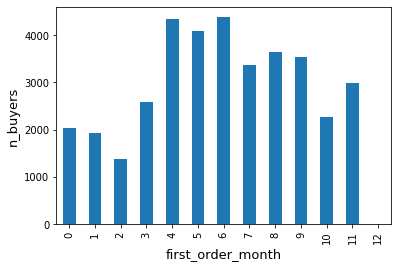

In [53]:
plt.figure(figsize=(6,4))
plt.ylabel('n_buyers', size=13)
plt.xlabel('first_order_month', size=13)
cohort_sizes['n_buyers'].plot(kind='bar')

**revenue tertinggi ada pada bulan ke-6 yaitu desember tahun 2017**

In [54]:
ltv = total_revenue_per_month['revenue']/cohort_sizes['n_buyers']
ltv

0     4.724414
1     6.520785
2     6.393270
3     7.107908
4     6.448779
5     6.633161
6     8.302213
7     5.756635
8     7.000970
9     8.161503
10    7.406880
11    6.939752
12    3.420000
dtype: float64

**nilai rata-rata ltv per bulannya yang tertinggi ada pada bulan ke-6 yaitu desember tahun 2017, nilai loyalitas pelanggan ada pada akhir tahun jika dilihat dari besarnya ltv dibulan ke 6, kemudian nilai ltv tidak stabil di bulan-bilan berikutnya, mungkin kita harus memperbaiki strategi pemasarannya salah satunya mungkin dengan meningkatkan pelayanan dan mempertahankan pelanggan yang memberikan loyalitas tinggi pada perusahaan**

### Pemasaran

In [55]:
# jumlah uang yang dihabiskan? Keseluruhan/per sumber/dari waktu ke waktu
costs['costs_month']=costs['dt'].astype('datetime64[M]')
costs

,source_id,dt,costs,costs_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01
2538,10,2018-05-28,21.26,2018-05-01
2539,10,2018-05-29,11.32,2018-05-01
2540,10,2018-05-30,33.15,2018-05-01


In [56]:
# jumlah pengeluaran keseluruhan
costs_total = costs['costs'].sum()
costs_total

329131.62

In [57]:
# memeriksa  ID sumber iklan
costs['source_id'].unique()

array([ 1,  2,  3,  4,  5,  9, 10])

In [58]:
# jumlah pengeluaran berdasarkan ID sumber iklan
costs_per_source = costs.groupby('source_id')['costs'].sum()
costs_per_source

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

<AxesSubplot:xlabel='source_id'>

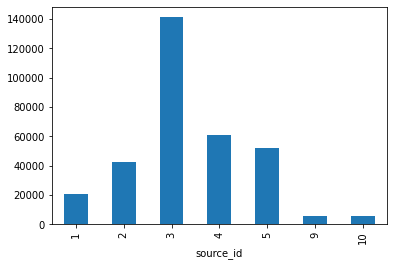

In [59]:
plt.figure(figsize=(6,4))
costs_per_source.plot(kind='bar')

In [60]:
costs_per_month = costs.groupby(['costs_month','source_id'])['costs'].sum().reset_index()
costs_per_month

,costs_month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12
...,...,...,...
79,2018-05-01,3,9411.42
80,2018-05-01,4,4214.21
81,2018-05-01,5,3669.56
82,2018-05-01,9,362.17


**sumber iklan dengan ID 3 mengeluarkan biaya pemasaran paling tinggi dari pada yang lain, dan biaya pengeluara tertinggi ada pada bulan desember tahun 2017**

**Jumlah penegeluaran paling tinggi ada pada bulan november dan desembar. Pendapatan tertinggi pun ada pada bulan desember, hal ini dapat kita lihat bahwa hal yang membuat pendapatan tinggi pada akhir tahun itu dikarenakan tim pemasaran banyak melakukan pemasaran sehingga biaya yang dikeluarkan tinggi dan pendapatan pun ikut tinggi.**

In [61]:
orders_ = pd.merge(orders, first_orders, on='uid')
orders_

,buy ts,revenue,uid,order_month,order_date,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-31,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-31,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-31,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-31,2018-05-01


In [62]:
cohorts = (
    orders_.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index())
cohorts

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58
...,...,...,...
74,2018-03-01,2018-05-01,1114.87
75,2018-04-01,2018-04-01,10600.69
76,2018-04-01,2018-05-01,1209.92
77,2018-05-01,2018-05-01,13925.76


In [63]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58
...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87
75,2018-04-01,2276,2018-04-01,10600.69
76,2018-04-01,2276,2018-05-01,1209.92
77,2018-05-01,2988,2018-05-01,13925.76


In [64]:
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

In [66]:
report_ = pd.merge(report, costs_per_month, left_on='first_order_month', right_on='costs_month')
report_

,first_order_month,n_buyers,order_month,revenue,age,costs_month,source_id,costs
0,2017-06-01,2023,2017-06-01,9557.49,0,2017-06-01,1,1125.61
1,2017-06-01,2023,2017-06-01,9557.49,0,2017-06-01,2,2427.38
2,2017-06-01,2023,2017-06-01,9557.49,0,2017-06-01,3,7731.65
3,2017-06-01,2023,2017-06-01,9557.49,0,2017-06-01,4,3514.80
4,2017-06-01,2023,2017-06-01,9557.49,0,2017-06-01,5,2616.12
...,...,...,...,...,...,...,...,...
541,2018-05-01,2988,2018-05-01,13925.76,0,2018-05-01,3,9411.42
542,2018-05-01,2988,2018-05-01,13925.76,0,2018-05-01,4,4214.21
543,2018-05-01,2988,2018-05-01,13925.76,0,2018-05-01,5,3669.56
544,2018-05-01,2988,2018-05-01,13925.76,0,2018-05-01,9,362.17


In [67]:
report_['cac'] = report_['costs'] / report_['n_buyers']
report_

,first_order_month,n_buyers,order_month,revenue,age,costs_month,source_id,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,0,2017-06-01,1,1125.61,0.556406
1,2017-06-01,2023,2017-06-01,9557.49,0,2017-06-01,2,2427.38,1.199891
2,2017-06-01,2023,2017-06-01,9557.49,0,2017-06-01,3,7731.65,3.821873
3,2017-06-01,2023,2017-06-01,9557.49,0,2017-06-01,4,3514.80,1.737420
4,2017-06-01,2023,2017-06-01,9557.49,0,2017-06-01,5,2616.12,1.293188
...,...,...,...,...,...,...,...,...,...
541,2018-05-01,2988,2018-05-01,13925.76,0,2018-05-01,3,9411.42,3.149739
542,2018-05-01,2988,2018-05-01,13925.76,0,2018-05-01,4,4214.21,1.410378
543,2018-05-01,2988,2018-05-01,13925.76,0,2018-05-01,5,3669.56,1.228099
544,2018-05-01,2988,2018-05-01,13925.76,0,2018-05-01,9,362.17,0.121208


In [68]:
report_['ltv'] = report_['revenue'] / report_['n_buyers']
report_

,first_order_month,n_buyers,order_month,revenue,age,costs_month,source_id,costs,cac,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,2017-06-01,1,1125.61,0.556406,4.724414
1,2017-06-01,2023,2017-06-01,9557.49,0,2017-06-01,2,2427.38,1.199891,4.724414
2,2017-06-01,2023,2017-06-01,9557.49,0,2017-06-01,3,7731.65,3.821873,4.724414
3,2017-06-01,2023,2017-06-01,9557.49,0,2017-06-01,4,3514.80,1.737420,4.724414
4,2017-06-01,2023,2017-06-01,9557.49,0,2017-06-01,5,2616.12,1.293188,4.724414
...,...,...,...,...,...,...,...,...,...,...
541,2018-05-01,2988,2018-05-01,13925.76,0,2018-05-01,3,9411.42,3.149739,4.660562
542,2018-05-01,2988,2018-05-01,13925.76,0,2018-05-01,4,4214.21,1.410378,4.660562
543,2018-05-01,2988,2018-05-01,13925.76,0,2018-05-01,5,3669.56,1.228099,4.660562
544,2018-05-01,2988,2018-05-01,13925.76,0,2018-05-01,9,362.17,0.121208,4.660562


In [69]:
report_['romi'] = report_['ltv'] / report_['cac']
report_

,first_order_month,n_buyers,order_month,revenue,age,costs_month,source_id,costs,cac,ltv,romi
0,2017-06-01,2023,2017-06-01,9557.49,0,2017-06-01,1,1125.61,0.556406,4.724414,8.490943
1,2017-06-01,2023,2017-06-01,9557.49,0,2017-06-01,2,2427.38,1.199891,4.724414,3.937369
2,2017-06-01,2023,2017-06-01,9557.49,0,2017-06-01,3,7731.65,3.821873,4.724414,1.236151
3,2017-06-01,2023,2017-06-01,9557.49,0,2017-06-01,4,3514.80,1.737420,4.724414,2.719213
4,2017-06-01,2023,2017-06-01,9557.49,0,2017-06-01,5,2616.12,1.293188,4.724414,3.653307
...,...,...,...,...,...,...,...,...,...,...,...
541,2018-05-01,2988,2018-05-01,13925.76,0,2018-05-01,3,9411.42,3.149739,4.660562,1.479666
542,2018-05-01,2988,2018-05-01,13925.76,0,2018-05-01,4,4214.21,1.410378,4.660562,3.304477
543,2018-05-01,2988,2018-05-01,13925.76,0,2018-05-01,5,3669.56,1.228099,4.660562,3.794940
544,2018-05-01,2988,2018-05-01,13925.76,0,2018-05-01,9,362.17,0.121208,4.660562,38.450893


In [70]:
output = report_.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean')
output.cumsum(axis=1).round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,11.99,13.23,14.34,16.76,19.36,21.23,23.64,25.11,26.52,28.06,29.51,30.16
2017-07-01,13.94,14.72,16.17,17.0,17.41,17.77,18.05,18.38,18.75,19.1,19.46,
2017-08-01,11.21,12.21,13.18,14.01,15.06,15.66,16.11,16.97,17.59,17.99,,
2017-09-01,12.76,15.28,16.46,25.45,26.35,27.82,29.4,29.95,30.37,,,
2017-10-01,13.23,14.65,15.16,15.57,15.97,16.29,16.52,16.82,,,,
2017-11-01,11.20,12.07,12.5,13.21,13.53,13.65,13.9,,,,,
2017-12-01,12.05,12.71,15.06,17.77,18.57,19.43,,,,,,
2018-01-01,9.12,9.77,10.45,10.76,10.9,,,,,,,
2018-02-01,10.87,11.6,11.8,11.99,,,,,,,,


In [71]:
#rata-rata nilai ROMI
output.cumsum(axis=1).mean(axis=0) 

age
0     11.946568
1     12.868300
2     13.951808
3     15.837340
4     17.144902
5     18.835679
6     19.603298
7     21.448392
8     23.308561
9     21.714999
10    24.482607
11    30.159834
dtype: float64

**jika dilihat nilai ROMI (return on marketing investment atau pengembalian investasi pemasaran) disetiap bulannya sudah dapat memberikan keuntungan dan dapat dibilang menguntungkan investasi tersebut. rata-rata ROMI (return on marketing investment atau pengembalian investasi pemasaran) di setiap bulannya terus meningkat. Hal ini merupakan hal yang positif bagi perusahaan**

<AxesSubplot:xlabel='age'>

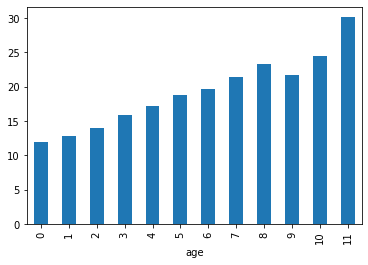

In [72]:
plt.figure(figsize=(6,4))
output.cumsum(axis=1).mean(axis=0).plot(kind='bar')

In [73]:
# Rata-rata Nilai cac (cost/pengguna) tiap sumber iklan ID
report_source = report_.groupby('source_id').agg({'cac': 'mean'})
report_source

,cac
source_id,
1,0.584459
2,1.204565
3,3.970902
4,1.788124
5,1.451675
9,0.155861
10,0.164318


**sumber iklan dengan ID 3 memiliki rata-rata tertinggi dari pada yang lain, hal ini artinya ID 3 lebih dapat banyak menarik pengguna**

## Kesimpulan

Dari hasil pengolahan data dari situs Y.Afisha platform iklah yang lebih menguntungkan dalam penjualan jika dilihat rata-rata cac-nya yaitu sumber iklan dengan ID 3, oleh sebab itu sumber iklan ID 3 lebih baik direkomendasikan kepada tim pemasaran karena terbukti lebih banyak menarik pelanggan untuk menggunakan situs Y.Afisha. Disini saya lebih fokus kepada persentase kembalinya pengguna, niai ltv, nilai ROMI (return on marketing investment atau pengembalian investasi pemasaran).

persentase pengguna kembali menggunakan situs Y.Afisha dilihat dari per bulannya yaitu sebesar 3.9%. nilai ini perlu di sampaikan kepada tim pemasaran dan tim dibagian produk unutk dapat meningkatkan kualitas dan service untuk pelanggan agar loyalitas pelanggan dapat meningkat situs Y.Afisha dapat sering dikunjungi.

pada bulan ke-6 yaitu bulan desember tahun 2017 revenue mengalami peningkatan yang cukup tinggi, mungkin tim pemasaran lebih efektif jika iklan dilakukan pada akhir tahun sehingga dapat memberi keuntungan yg cukup tinggi dari segi bisnis. dan kemudian nilai ltv tidak stabil di bulan-bilan berikutnya, mungkin tim pemasaran harus memperbaiki strategi pemasarannya di bulan-bulan yang lainnya seperti meningkatkan pelayanan dan mempertahankan pelanggan yang memberikan loyalitas tinggi pada perusahaan, sehingga tidak hanya diakhir tahun saya peningkatannya meningkat.

jika dilihat nilai ROMI (return on marketing investment atau pengembalian investasi pemasaran) disetiap bulannya sudah dapat memberikan keuntungan dan dapat dibilang menguntungkan investasi tersebut. rata-rata ROMI di setiap bulannya terus meningkat. Hal ini merupakan hal yang positif bagi perusahaan.

Maka dapat disimpulkan bahwa perusahaan telah mendapatkan keuntungan dari segi pemasaran, mungkin yang lebih ditingkantkan kembali yaitu loyalitas pelanggan untuk kembali menggunakan situs Y.Afisha, dan perlu mencari kembali strategi pemasaran yang dapat meningkatkan pelanggan seperti meningkatkan kualitas produk, meningkatkan pelayanan dan mempertahankan pelanggan yang memberikan loyalitas tinggi pada perusahaan. 